In [2]:
#library
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#generer datasets
x , y = make_blobs(n_samples=1000 , n_features=2 , centers=2 , random_state=0)

# SVM works with -1 and 1 lables this is why we convert [0,1] to [-1,1]
y = np.where(y==0 , -1 , 1)

#split data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25)


In [4]:
# generer parametre 
def initParameters(x):
       w = np.random.randn(x.shape[1])
       b = np.random.randn(1)
       return w , b

In [5]:
def gradient(xi,yi,w,condition,lambda_parameter):
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
            return dw , db
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
            return dw , db

In [6]:
def train(x_train,y_train,lambda_parameter=0.01,nbr_iteration=1000,learning_rate=0.01):

    w,b = initParameters(x_train)
    for i in range(nbr_iteration):
        for index , xi in enumerate(x_train):
            condition = y_train[index] * (np.dot(xi ,w) -  b ) >= 1
            dw , db = gradient(xi, y_train[index],w, condition,lambda_parameter)
            #Update The Weights and The Bias
            w -= learning_rate * dw
            b -= learning_rate * db
    return w,b

In [7]:
def predict(x,w,b):
        y_hat = np.dot(x ,  w) -  b
        return np.sign(y_hat)

In [8]:
def displayTheModel(x,y,w,b):
        fig , ax = plt.subplots()
        ax.scatter(x[:,0][y==1] , x[:,1][y==1] , marker='o')
        ax.scatter(x[:,0][y==-1] , x[:,1][y==-1] , marker='+')
        
        x0_min = np.amin(x[:,0])
        x0_max = np.amax(x[:,0])
        
        x1_x_for_separator = (-w[0] * x0_min + b + 0 ) / w[1]
        x1_y_for_separator = (-w[0] * x0_max + b + 0 ) /  w[1]

        x1_x_for_class1 = (- w[0] * x0_min +  b -1 ) /  w[1]
        x1_y_for_class1 = (- w[0] * x0_max +  b -1 ) /  w[1]

        x1_x_for_class2 = (- w[0] * x0_min +  b + 1 ) /  w[1]
        x1_y_for_class2 = (- w[0] * x0_max +  b + 1 ) /  w[1]
        
        ax.plot([x0_min , x0_max] , [x1_x_for_separator , x1_y_for_separator] , "red")
        ax.plot([x0_min , x0_max] , [x1_x_for_class1 , x1_y_for_class1] , "black")
        ax.plot([x0_min , x0_max] , [x1_x_for_class2 , x1_y_for_class2] , "black")
        
        x1_min = np.amin(x[:, 1])
        x1_max = np.amax(x[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        
        plt.show()
    # Function to get The Accuracy of The Model    
def getAccuarcy( y_true , y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

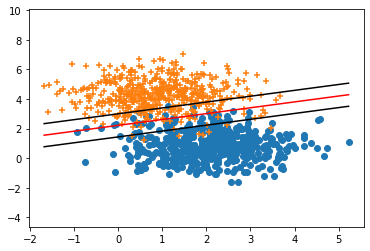

score est :  0.958


In [9]:
# tester
w,b = train(x,y)
displayTheModel(x,y,w,b)
y_pred = predict(x,w,b)
score = getAccuarcy(y,y_pred)
print('score est : ',score)

In [10]:

import numpy as np 
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
x, y = make_blobs (n_samples=100 , n_features=2, centers=2 , random_state=0)
y = np.where(y==0, -1, 1) 
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25) 
SVM_Classifier = SVC(); 
SVM_Classifier.fit(x_train, y_train) 
y_pred = SVM_Classifier.predict(x_test) 
accuarcy = np.sum(y_pred == y_test) / len(y_test) 
print(f"Model Accuracy : {accuarcy} % .")


Model Accuracy : 0.92 % .


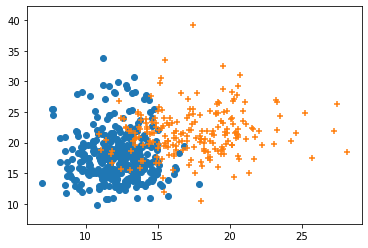

score est :  0.7398945518453427


In [12]:
from sklearn.datasets import load_breast_cancer



dataset = load_breast_cancer()
x,y = np.array(dataset.data), np.array(dataset.target)
y = np.where(y==0, -1, 1)


w,b = train(x,y,0.01,1000,0.001)
displayTheModel(x,y,w,b)
y_pred = predict(x,w,b)
score = getAccuarcy(y,y_pred)
print('score est : ',score)